In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv("BostonHousing.csv")

In [10]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
dataset.shape

(506, 14)

In [12]:
dataset.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [13]:
dataset.fillna(dataset.mean(), inplace=True)

In [14]:
dataset.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: xlabel='rm', ylabel='medv'>

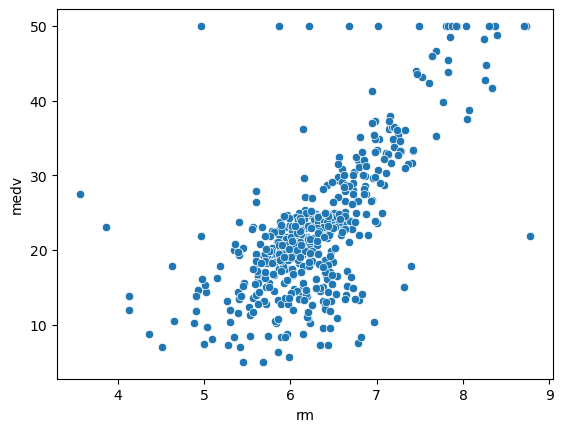

In [17]:
sns.scatterplot(x='rm',y='medv',data=dataset)

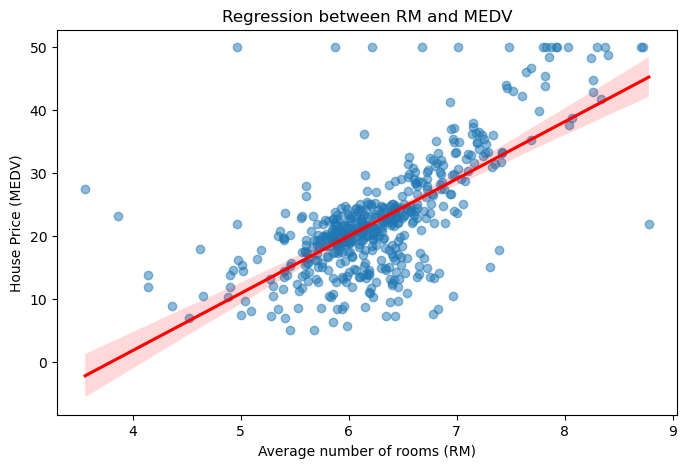

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(x=dataset['rm'], y=dataset['medv'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Regression between RM and MEDV")
plt.show()

In [24]:
X = dataset[['rm']]
Y = dataset['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_pred = model.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df.head())

     Actual  Predicted
365    27.5  -3.215473
313    21.6  22.192308
461    17.7  23.225527
158    24.3  20.313729
333    22.2  22.661953


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred)) 

Mean Squared Error: 49.359238697733865
R² Score: 0.3581009134356232
